In [28]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "45"
os.environ["NUMBA_NUM_THREADS"] = "45"

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cmap = sns.color_palette("colorblind")

In [3]:
import sys
sys.path.append("../code/")

from objectives import get_qaoa_labs_objective

In [4]:
params_MF = json.load(open('../qokit/assets/mean_params_0320_MF.json', 'r'))
params_overlap = json.load(open('../qokit/assets/mean_params_0228.json', 'r'))

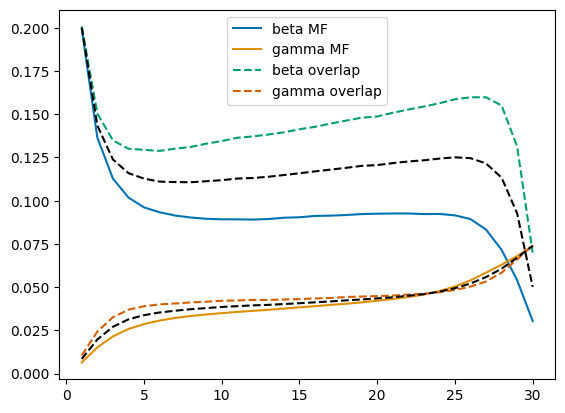

In [5]:
p = 30
row1 = params_MF[str(p)]
beta_MF = np.array(row1['beta'])
gamma_MF = np.array(row1['gamma'])

row2 = params_overlap[str(p)]
beta_overlap = np.array(row2['beta'])
gamma_overlap = np.array(row2['gamma'])

f, ax = plt.subplots()

ax.plot(range(1, p+1), -beta_MF, c=cmap[0], label='beta MF')
ax.plot(range(1, p+1), gamma_MF/20, c=cmap[1], label='gamma MF')

ax.plot(range(1, p+1), -beta_overlap, linestyle='dashed', c=cmap[2], label='beta overlap')
ax.plot(range(1, p+1), gamma_overlap/20, linestyle='dashed', c=cmap[3], label='gamma overlap')

t = 0.5

beta_intermed = t*beta_MF + (1-t)*beta_overlap
gamma_intermed = t*gamma_MF + (1-t)*gamma_overlap

ax.plot(range(1, p+1), -beta_intermed, linestyle='dashed', c='k')
ax.plot(range(1, p+1), gamma_intermed/20, linestyle='dashed', c='k')

plt.legend()

In [16]:
def interpolate_between_MF_overlap(N, p, npoints):
    f = get_qaoa_labs_objective(N, p, parameterization="gamma beta", objective="expectation and overlap")
    params_MF = json.load(open('../qokit/assets/mean_params_0320_MF.json', 'r'))
    params_overlap = json.load(open('../qokit/assets/mean_params_0228.json', 'r'))
    
    row1 = params_MF[str(p)]
    beta_MF = np.array(row1['beta'])
    gamma_MF = np.array(row1['gamma'])

    row2 = params_overlap[str(p)]
    beta_overlap = np.array(row2['beta'])
    gamma_overlap = np.array(row2['gamma'])
    
    res_rows = []
    
    for t in np.linspace(-0.5,1.5,npoints):
        beta_intermed = t*beta_MF + (1-t)*beta_overlap
        gamma_intermed = (t*gamma_MF + (1-t)*gamma_overlap) / N
        e, o = f(gamma_intermed, beta_intermed) 
        
        row = {
            "overlap transferred": 1 - o,
            "merit factor transferred": -e,
            "N": N,
            "p": p,
            "beta": beta_intermed,
            "gamma": gamma_intermed,
            "t": t,
        }
        res_rows.append(row)
        print(f'{t:.3f}\t{row["overlap transferred"]:.5f}\t{row["merit factor transferred"]:.5f}')
        
    return res_rows
        

In [43]:
# Uncomment to run
# res_rows = interpolate_between_MF_overlap(25, 30, 81)
# df = pd.DataFrame(res_rows, columns=res_rows[0].keys())

# df.to_json('../qokit/assets/extrapolate_between_MF_and_overlap.json')

/opt/omniai/work/instance1/jupyter/jpmc-argonne-quantum-optimization/jupyter/../code/objectives.py:187: UserWarning: CUDA is NOT available, using cfurx simulator
  warnings.warn(f"CUDA is NOT available, using {simulator} simulator")


-0.500	0.00107	1.31638
-0.475	0.00116	1.33615
-0.450	0.00134	1.35765
-0.425	0.00161	1.38089
-0.400	0.00198	1.40629
-0.375	0.00246	1.43383
-0.350	0.00306	1.46387
-0.325	0.00376	1.49670
-0.300	0.00456	1.53265
-0.275	0.00544	1.57147
-0.250	0.00636	1.61307
-0.225	0.00731	1.65778
-0.200	0.00825	1.70551
-0.175	0.00916	1.75601
-0.150	0.00998	1.80908
-0.125	0.01069	1.86499
-0.100	0.01128	1.92320
-0.075	0.01171	1.98361
-0.050	0.01198	2.04628
-0.025	0.01208	2.11072
0.000	0.01201	2.17687
0.025	0.01178	2.24415
0.050	0.01139	2.31248
0.075	0.01087	2.38177
0.100	0.01026	2.45206
0.125	0.00956	2.52296
0.150	0.00880	2.59413
0.175	0.00803	2.66549
0.200	0.00724	2.73682
0.225	0.00648	2.80791
0.250	0.00575	2.87889
0.275	0.00507	2.94960
0.300	0.00445	3.01979
0.325	0.00389	3.08914
0.350	0.00340	3.15761
0.375	0.00297	3.22495
0.400	0.00261	3.29080
0.425	0.00230	3.35488
0.450	0.00203	3.41694
0.475	0.00182	3.47702
0.500	0.00164	3.53486
0.525	0.00149	3.59031
0.550	0.00136	3.64295
0.575	0.00126	3.69267
0.600	0.0011

In [44]:
df.to_json('../qokit/assets/extrapolate_between_MF_and_overlap.json')

In [45]:
df = pd.read_json('../qokit/assets/extrapolate_between_MF_and_overlap.json')

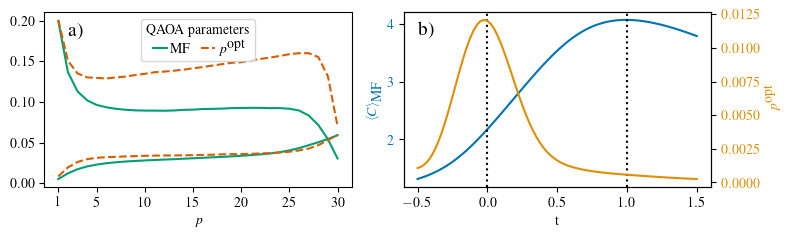

In [66]:
f, ax = plt.subplots(1,2,figsize=(8, 2.47213))

df.set_index('t')['merit factor transferred'].plot(ax=ax[1], c=cmap[0], label=r'$\langle C\rangle_{\mbox{MF}}$')
ax[1].set_ylabel(r'$\langle C\rangle_{\mbox{MF}}$', c=cmap[0])
ax[1].tick_params(axis='y', labelcolor=cmap[0])

ax[1].axvline(0, c='k', linestyle='dotted')
ax[1].axvline(1, c='k', linestyle='dotted')
ax[1].text(-0.5, 3.8, 'b)', fontsize=14)

ax01 = ax[1].twinx()

df.set_index('t')['overlap transferred'].plot(ax=ax01, c=cmap[1], label=r'$p^{\mbox{opt}}$')
ax01.set_ylabel(r'$p^{\mbox{opt}}$', c=cmap[1])
ax01.tick_params(axis='y', labelcolor=cmap[1])

p = 30
row1 = params_MF[str(p)]
beta_MF = np.array(row1['beta'])
gamma_MF = np.array(row1['gamma'])

row2 = params_overlap[str(p)]
beta_overlap = np.array(row2['beta'])
gamma_overlap = np.array(row2['gamma'])

# ax[0].plot(range(1, p+1), -beta_MF, c=cmap[0], label=r'$\beta^{\mbox{Fixed}}$ $p^{\mbox{opt}}$')
# ax[0].plot(range(1, p+1), gamma_MF/25, c=cmap[1], label=r'$\gamma^{\mbox{Fixed}}$ $p^{\mbox{opt}}$')
ax[0].plot(range(1, p+1), -beta_MF, c=cmap[2])
ax[0].plot(range(1, p+1), gamma_MF/25, c=cmap[2], label=r'MF')

# ax[0].plot(range(1, p+1), -beta_overlap, linestyle='dashed', c=cmap[2], label=r'$\beta^{\mbox{Fixed}}$ MF')
# ax[0].plot(range(1, p+1), gamma_overlap/25, linestyle='dashed', c=cmap[3], label=r'$\gamma^{\mbox{Fixed}}$ MF')
ax[0].plot(range(1, p+1), -beta_overlap, linestyle='dashed', c=cmap[3])
ax[0].plot(range(1, p+1), gamma_overlap/25, linestyle='dashed', c=cmap[3], label=r'$p^{\mbox{opt}}$')
ax[0].legend(title='QAOA parameters', ncols=2, loc='upper center', labelspacing=0.25, handletextpad=0.25, handlelength=1, columnspacing=0.75)
ax[0].set_xticks([1] + list(range(5, 26, 5)) + [30])
ax[0].set_xlabel(r'$p$')
ax[0].text(2, 0.18, 'a)', fontsize=14)

plt.tight_layout()
plt.savefig('figures/MF_vs_overlap_parameters.pdf')